#### test notebook for skeleton plot

In [2]:
%load_ext autoreload
%autoreload 2
import skeleton_plot as skelplot
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#various google cloud paths 

#raw skeleton files
skel_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'
skel_dir = '864691134884807418_518848'
skel_filename = '864691134884807418_518848.swc'

# upright
upright_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/upright/BIL_excitatory/'

# layer aligned
layer_aligned_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/layer_align/BIL_excitatory/'


# polygon files (layer bounds for each cell)
# gives 2d shape for each layer 
layer_bounds_path = 'https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/poly_files/BIL_polys/'

# average layer bounds from IVSCC (to which layer aligned celled are alligned)
# this just gives a single value for each layer (straight line)
layer_bounds_average_path = "gs://allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/"
avg_layerdepths_filename = 'mouse_me_and_met_avg_layer_depths.json'


# mesh path with gs://
mw_path = 'gs://allen-minnie-phase3/minniephase3-emily-pcg-skeletons/minnie_all/BIL_neurons/file_groups/'


rid = 864691134884807418
sid = 518848


In [4]:
# successful run 
depths = skelplot.plot_tools.read_depths(layer_bounds_average_path, avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [5]:
# now https version 
depths = skelplot.plot_tools.read_depths('https://storage.googleapis.com/allen-minnie-phase3/minniephase3-emily_skeleton_keys/avg_layer_depths/',
                                         avg_layerdepths_filename)
depths

{'2/3': 115.1112491335,
 '4': 333.4658190171,
 '5': 453.6227158132,
 '6a': 687.6482650269,
 '6b': 883.1308910545,
 'wm': 922.5861720311}

In [6]:
# should raise error
depths = skelplot.plot_tools.read_depths('layer_bounds_average_path', 'avg_layerdepths_filename')
depths


UnsupportedProtocolError: [1;93m
Cloud Path must conform to [FORMAT://]PROTOCOL://PATH
Examples: 
  precomputed://gs://test_bucket/em
  gs://test_bucket/em
  graphene://https://example.com/image/em

Supported Formats: None (precomputed), graphene, precomputed, boss
Supported Protocols: gs, file, s3, matrix, http, https, mem

Cloud Path Recieved: layer_bounds_average_path
[m

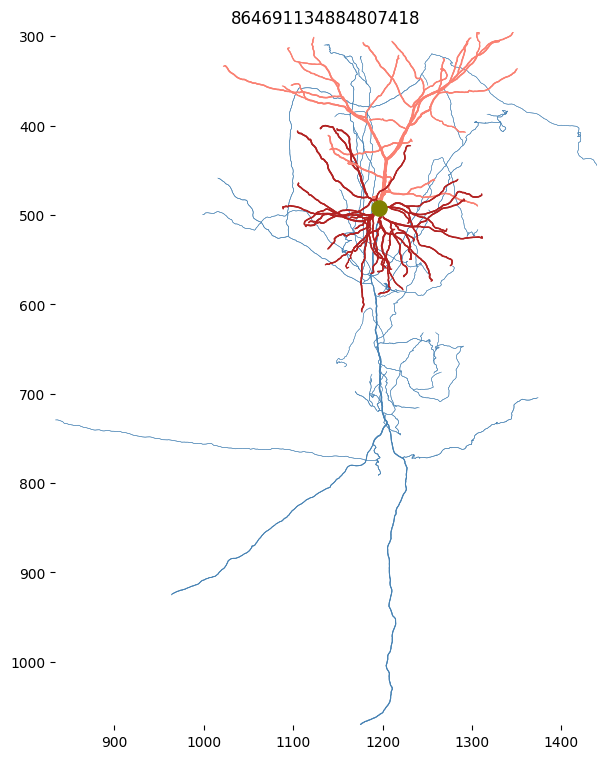

In [48]:
# plot the radii from the swc 
rid = 864691134884807418
sid = 518848
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')



f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True, plot_compartment_colors = True,
                              invert_y=True, plot_soma = True, 
                             line_width = 3, color = 'darkslategray')

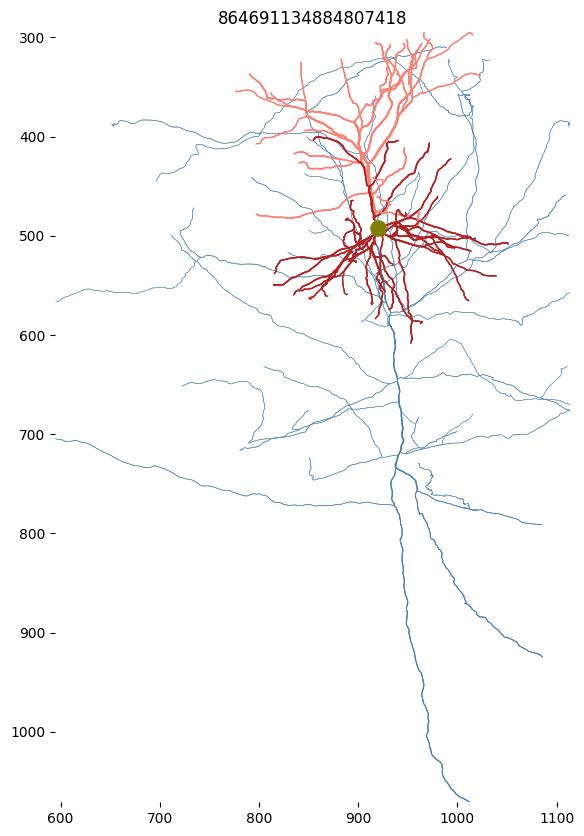

In [49]:
# invert y and x 
f , ax = plt.subplots(figsize=(7,10))
skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True, plot_compartment_colors = True,
                              invert_y=True, plot_soma = True, x = 'z', y = 'y',
                             line_width = 3)


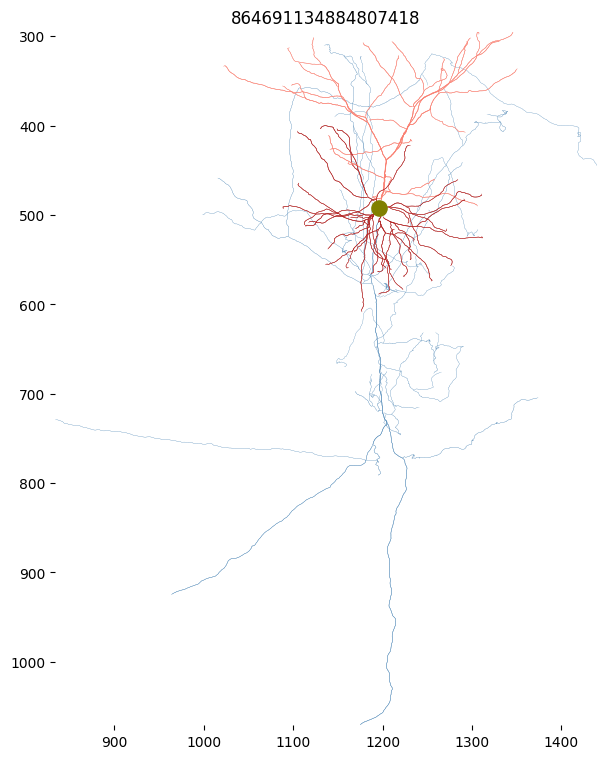

In [50]:
# plot with constant radius 
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_skel(ax, sk, title=rid, line_width=1, plot_soma=True, 
                                invert_y=True, plot_compartment_colors = True)



In [10]:
# check other swcs of mine, upright, layer aligned, etc 

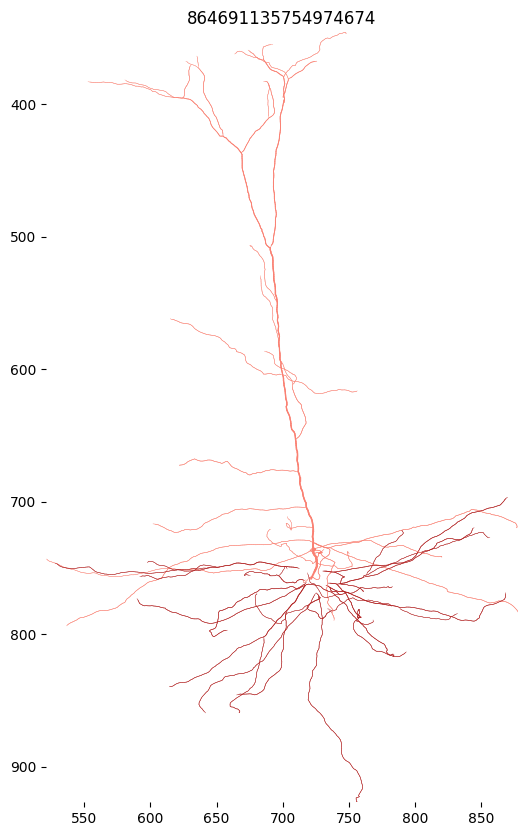

In [46]:
# plot some thicker skeletons with radius map 
rid = 864691135754974674
sid = 300897
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width=1, plot_compartment_colors = True)

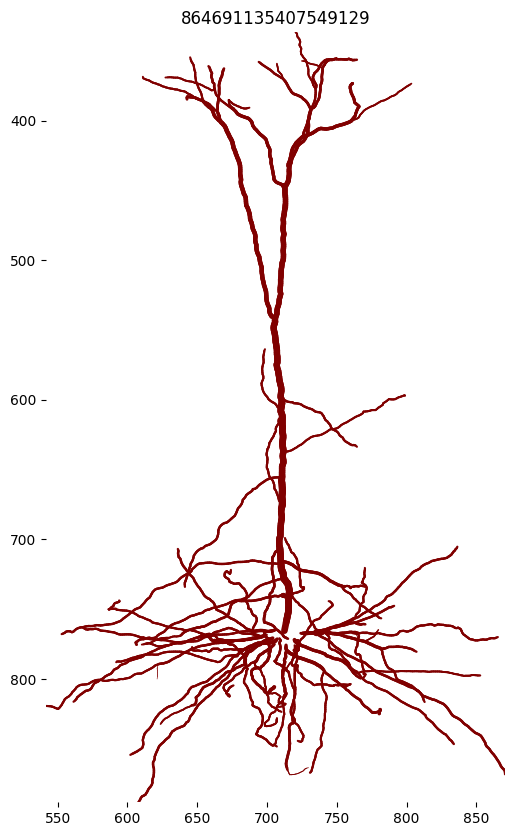

In [43]:
rid = 864691135407549129
sid = 265045
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 5, color = 'maroon')




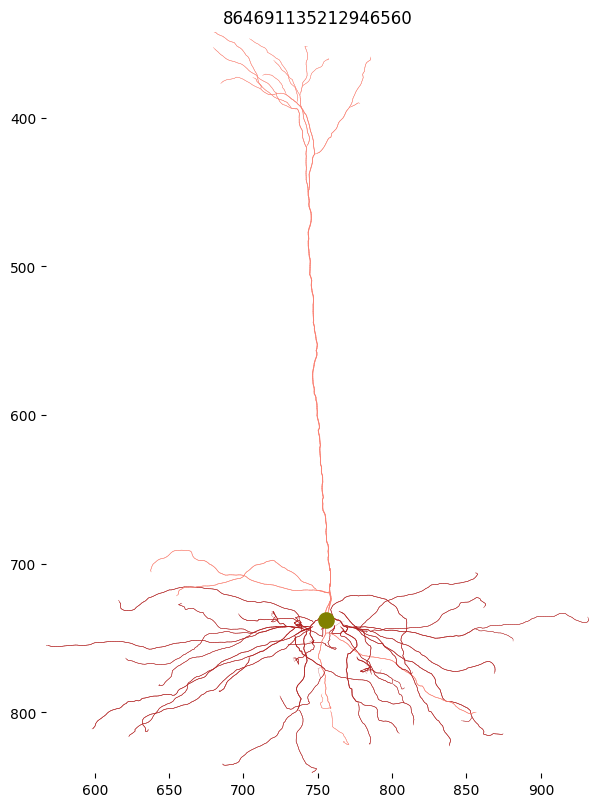

In [41]:
rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_skel(ax, sk, title=rid,  plot_radius = True,
                              invert_y=True, line_width = 1, plot_soma = True,
                             plot_compartment_colors = True)

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'
df = skelplot.plot_tools.read_swc(swc_path)




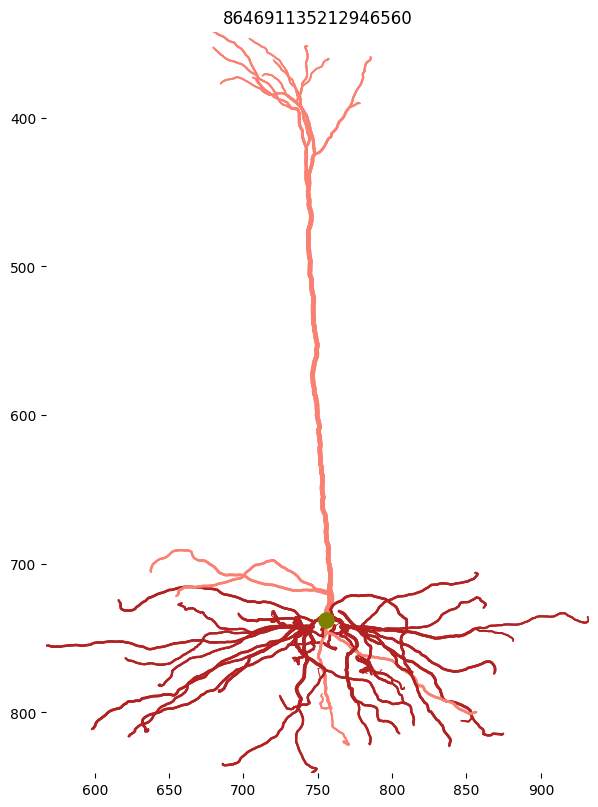

In [39]:
rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_verts(ax, sk.vertices, sk.edges, radii = sk.vertex_properties['radius'],
                               compartments = sk.vertex_properties['compartment'], title=rid,  
                              invert_y=True, line_width = 5, plot_soma = True,
                             )

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'

df = skelplot.plot_tools.read_swc(swc_path)




In [14]:
import pandas as pd
pd.Series(list(sk.vertex_properties['compartment']))

0       1
1       4
2       4
3       4
4       4
       ..
3856    3
3857    3
3858    3
3859    3
3860    3
Length: 3861, dtype: int64

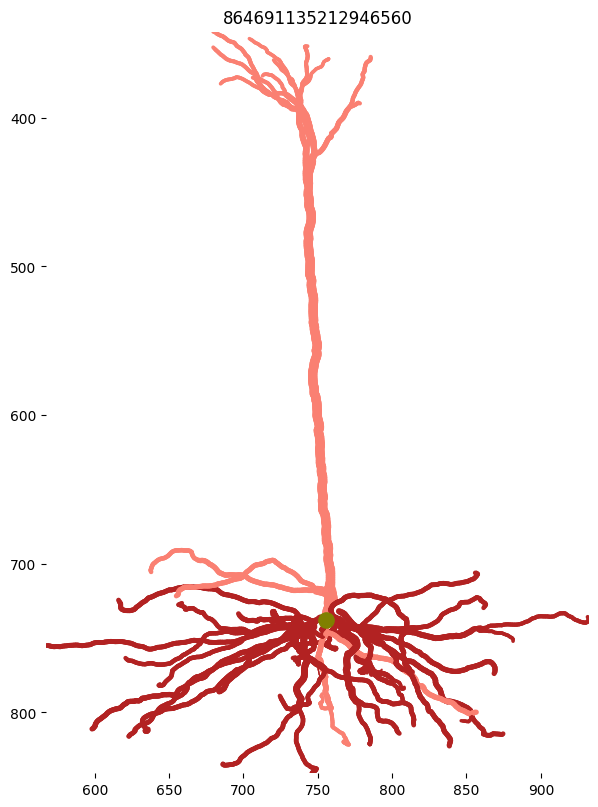

In [37]:
# test plot verts

rid = 864691135212946560
sid = 301225
sk = skelplot.plot_tools.read_skeleton(cloudfile_dir = skel_path+f'{rid}_{sid}', 
                                       filename = f'{rid}_{sid}.swc')
f , ax = plt.subplots(figsize=(7,10))


skelplot.plot_tools.plot_verts(ax, sk.vertices, sk.edges, compartments = sk.vertex_properties['compartment'],
                               radii = sk.vertex_properties['radius'], title=rid, 
                              invert_y=True, line_width = 10, plot_soma = True)

swc_path = f'{skel_path}{rid}_{sid}/{rid}_{sid}.swc'
df = skelplot.plot_tools.read_swc(swc_path)


In [24]:
c = [1]
c != []

True

NameError: name 'nrn' is not defined

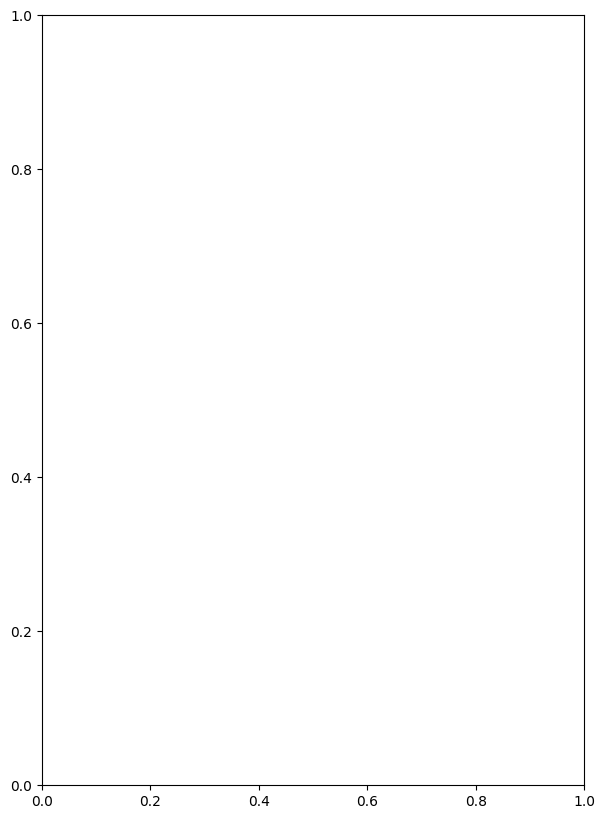

In [25]:
# test plot_mw_skel

rid = 864691134884807418
sid = 518848
filename = f"{rid}_{sid}/{rid}_{sid}.h5"

mw = skelplot.plot_tools.load_mw(filename, mw_path)
f , ax = plt.subplots(figsize=(7,10))

skelplot.plot_tools.plot_mw_skel(ax, mw, plot_radius = True,
                              invert_y=True, line_width = 1, plot_soma = True,
                             plot_compartment_colors = True)

In [95]:
mw.skeleton.vertex_properties

[autoreload of skeleton_plot.plot_tools failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/mytest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/mytest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/mytest/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/emily.joyce/Work/Repos/skeleton_plot/skeleton_plot/plot_tools.py", line 207, in <module>
    compartments = sk.vertex_properties['compartments'], color = 'darkslategray',
NameError: name 'sk' is not defined
]


{}

In [108]:
compartments = np.ones(len(sk.vertices))
compartments[mw.anno.apical_mesh_labels.skel_index] = 4
compartments[mw.anno.basal_mesh_labels.skel_index] = 3
compartments[len(mw.anno.is_axon.skel_index)] = 2

[autoreload of skeleton_plot.plot_tools failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/mytest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/mytest/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/mytest/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/emily.joyce/Work/Repos/skeleton_plot/skeleton_plot/plot_tools.py", line 221
    sk.vertex_properties[

In [130]:
mw.anno.segment_properties.df

,area,area_factor,is_root,len,mesh_ind,r_eff,seg_num,strahler,vol,mesh_ind_filt
0,462847040,1.634471,False,394605.0000,0,114.213572,0,1,16171409920,0
1,462847040,1.634471,False,394605.0000,1,114.213572,0,1,16171409920,1
2,462847040,1.634471,False,394605.0000,2,114.213572,0,1,16171409920,2
3,462847040,1.634471,False,394605.0000,3,114.213572,0,1,16171409920,3
4,462847040,1.634471,False,394605.0000,4,114.213572,0,1,16171409920,4
...,...,...,...,...,...,...,...,...,...,...
16840,503843584,1.675824,False,437774.9375,16840,109.304131,192,1,16431375360,16840
16841,503843584,1.675824,False,437774.9375,16841,109.304131,192,1,16431375360,16841
16842,503843584,1.675824,False,437774.9375,16842,109.304131,192,1,16431375360,16842
16843,503843584,1.675824,False,437774.9375,16843,109.304131,192,1,16431375360,16843


In [136]:
len(mw.anno.pre_syn.skel_index
)

571

In [105]:
len(mw.skeleton.vertices)

7167

In [142]:
mw.anno.vol_prop.skel_index


JointSkeletonIndex([   0,    1,    2, ..., 7164, 7165, 7166])

In [146]:
mw.anno.vol_prop.df

,area_nm2,max_dt_nm,mean_dt_nm,mesh_ind,mesh_ind_filt,size_nm3,mesh_ind_filt
0,546880,64,28.687500,0,0,10570240,0
1,2257088,95,33.343750,1,1,57354240,1
2,2269248,96,34.218750,2,2,60779520,2
3,658176,86,34.468750,3,3,18035200,3
4,1151552,80,33.343750,4,4,29918720,4
...,...,...,...,...,...,...,...
16840,1686976,89,29.484375,16840,16840,38876160,16840
16841,141952,136,44.125000,16841,16841,5358080,16841
16842,53632,56,22.000000,16842,16842,1052160,16842
16843,192768,64,25.906250,16843,16843,3852800,16843


In [159]:
mw.anno.segment_properties.df['re']

            area  area_factor  is_root          len  mesh_ind       r_eff  \
0      462847040     1.634471    False  394605.0000         0  114.213572   
1      462847040     1.634471    False  394605.0000         1  114.213572   
2      462847040     1.634471    False  394605.0000         2  114.213572   
3      462847040     1.634471    False  394605.0000         3  114.213572   
4      462847040     1.634471    False  394605.0000         4  114.213572   
...          ...          ...      ...          ...       ...         ...   
16840  503843584     1.675824    False  437774.9375     16840  109.304131   
16841  503843584     1.675824    False  437774.9375     16841  109.304131   
16842  503843584     1.675824    False  437774.9375     16842  109.304131   
16843  503843584     1.675824    False  437774.9375     16843  109.304131   
16844  503843584     1.675824    False  437774.9375     16844  109.304131   

       seg_num  strahler          vol  mesh_ind_filt  
0            0      

In [158]:
mw.anno.segment_properties.skel_index.df

AttributeError: 'JointSkeletonIndex' object has no attribute 'df'

In [154]:
(mw.anno.segment_properties.skel_index)

JointSkeletonIndex([   0,    1,    2, ..., 7164, 7165, 7166])

In [157]:
sk.vertex_properties

{'radius': 0       6.146
 1       0.511
 2       0.511
 3       0.511
 4       0.511
         ...  
 9881    0.072
 9882    0.072
 9883    0.072
 9884    0.051
 9885    0.051
 Name: radius, Length: 9886, dtype: float64,
 'compartment': 0       1
 1       3
 2       3
 3       3
 4       3
        ..
 9881    3
 9882    3
 9883    3
 9884    3
 9885    3
 Name: type, Length: 9886, dtype: int64}